# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [7]:
import scipy.io
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the .mat files
mat_invol = scipy.io.loadmat('epochs_blinks_ASR_invol.mat')
mat_vol = scipy.io.loadmat('epochs_blinks_ASR_vol.mat')

# Extract the data from the .mat files
data_invol = mat_invol['epochs_blinks_ASR_invol']
data_vol = mat_vol['epochs_blinks_ASR_vol']

# Number of features ('FP1' and 'FP2'), time steps and samples
n_features = data_invol.shape[0]
n_timesteps = data_invol.shape[1]
n_samples_invol = data_invol.shape[2]
n_samples_vol = data_vol.shape[2]

# Reshape the data to be of size (samples, timesteps, features)
data_invol = np.transpose(data_invol, (2, 1, 0))
data_vol = np.transpose(data_vol, (2, 1, 0))

# Create labels for the involuntary (0) and voluntary (1) data
labels_invol = np.zeros((n_samples_invol, 1))
labels_vol = np.ones((n_samples_vol, 1))

# Combine the involuntary and voluntary data and labels
X = np.concatenate((data_invol, data_vol), axis=0)
y = np.concatenate((labels_invol, labels_vol), axis=0)


In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, Bidirectional
from keras.layers import MaxPooling1D, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (70% training, 30% temporary)
X_temp, X_train, y_temp, y_train = train_test_split(X, y, test_size=0.7, random_state=42, shuffle=True)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)


In [20]:
# Define the model
model = Sequential()

# Convolutional layer
model.add(Conv1D(128, 5, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(2))

# Batch normalization layer
model.add(BatchNormalization())

# LSTM layer
model.add(Bidirectional(LSTM(50, return_sequences=True)))  # Bidirectional LSTM layer with 50 units

# Dropout for regularization
model.add(Dropout(0.5))

# LSTM layer
model.add(Bidirectional(LSTM(50)))  # Another Bidirectional LSTM layer with 50 units

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))  

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data and validate on the validation data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
20/20 [==============================] - 34s 2s/step - loss: 0.6338 - accuracy: 0.6378 - val_loss: 0.8603 - val_accuracy: 0.5662
Epoch 2/10
20/20 [==============================] - 33s 2s/step - loss: 0.5380 - accuracy: 0.7291 - val_loss: 0.7397 - val_accuracy: 0.6029
Epoch 3/10
20/20 [==============================] - 34s 2s/step - loss: 0.5061 - accuracy: 0.7780 - val_loss: 0.6577 - val_accuracy: 0.5956
Epoch 4/10
20/20 [==============================] - 34s 2s/step - loss: 0.4757 - accuracy: 0.7811 - val_loss: 0.7083 - val_accuracy: 0.6029
Epoch 5/10
20/20 [==============================] - 33s 2s/step - loss: 0.4586 - accuracy: 0.7969 - val_loss: 0.6502 - val_accuracy: 0.6324
Epoch 6/10
20/20 [==============================] - 34s 2s/step - loss: 0.4314 - accuracy: 0.8063 - val_loss: 0.5925 - val_accuracy: 0.6912
Epoch 7/10
20/20 [==============================] - 34s 2s/step - loss: 0.4076 - accuracy: 0.8205 - val_loss: 0.5704 - val_accuracy: 0.6765
Epoch 8/10
20/20 [==

In [21]:
# Test the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

5/5 [==============================] - 3s 600ms/step - loss: 0.7283 - accuracy: 0.6618
Test loss: 0.7282834649085999, Test accuracy: 0.6617646813392639


In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [7]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
#Vectorize for the train data
count_vect_train = CountVectorizer()
X_counts_train = count_vect_train.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
print(X_counts_train[0])

  (0, 2630)	1
  (0, 5131)	1
  (0, 3183)	2
  (0, 4145)	1
  (0, 10051)	3
  (0, 842)	1
  (0, 3488)	1
  (0, 1026)	1
  (0, 9808)	1
  (0, 9659)	1
  (0, 9119)	2
  (0, 976)	1
  (0, 9467)	1
  (0, 4571)	1
  (0, 6961)	1
  (0, 7182)	1
  (0, 9180)	1
  (0, 10059)	1
  (0, 3725)	1
  (0, 6191)	1
  (0, 5853)	1
  (0, 4798)	1
  (0, 296)	1


In [8]:
#Vectorize for the test data
count_vect_test = CountVectorizer()
X_counts_test = count_vect_test.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix
print(X_counts_test[0])

  (0, 1813)	1
  (0, 1427)	1
  (0, 1088)	1
  (0, 1240)	2
  (0, 1258)	1
  (0, 1687)	1
  (0, 327)	1
  (0, 1892)	1
  (0, 1686)	1
  (0, 1040)	1
  (0, 61)	1
  (0, 156)	1
  (0, 867)	1
  (0, 482)	1
  (0, 1556)	1
  (0, 188)	1
  (0, 700)	1


In [9]:
#We get the frequencies for each word in the train data
term_frequencies_train = []
for j in range(0,X_counts_train.shape[1]):
    term_frequencies_train.append(sum(X_counts_train[:,j].toarray()))

#After adding the frequencies we sort it from max to min (descending order) 
term_frequencies_train = np.asarray(X_counts_train.sum(axis=0))[0]
term_sort_frequencies_train = np.sort(term_frequencies_train)[::-1]

#We get the index from the items sorted from max to min too (descending order)
index_train_terms=np.argsort(term_frequencies_train)[::-1]
index_train_cut=index_train_terms[:30]

print(index_train_cut)
print(count_vect_train.get_feature_names_out()[index_train_cut])

[ 8930  9119   537 10051  6371  4546  4571  4383  8924  5957  3391  6422
   976  5577  9020  8264  4009  6235  4798  1448  9872   757  1504  5186
   464   670 10059  9678  9782  4319]
['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'like' 'all'
 'are' 'your' 'was' 'when' 'if']


In [10]:
#We get the frequencies for each word in the test data
term_frequencies_test = []
for j in range(0,X_counts_test.shape[1]):
    term_frequencies_test.append(sum(X_counts_test[:,j].toarray()))
    
#After adding the frequencies we sort it from max to min (descending order)
term_frequencies_test = np.asarray(X_counts_test.sum(axis=0))[0]
term_sort_frequencies_test = np.sort(term_frequencies_test)[::-1]

#We get the index from the items sorted from max to min too (descending order)
index_test_terms=np.argsort(term_frequencies_test)[::-1]
index_test_cut=index_test_terms[:30]

print(index_test_cut)
print(count_vect_test.get_feature_names_out()[index_test_cut])

[1687 1739   99  909 1240 1938  903  867  655 1686 1165 1257  185 1088
 1843 1567  290  150  785   82  934  133 1893  277  705 1940 1804 1712
 1009 1212]
['the' 'to' 'and' 'it' 'of' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'was' 'so' 'can' 'at' 'have' 'all' 'just' 'are' 'with' 'but' 'get'
 'your' 'up' 'this' 'like' 'not']


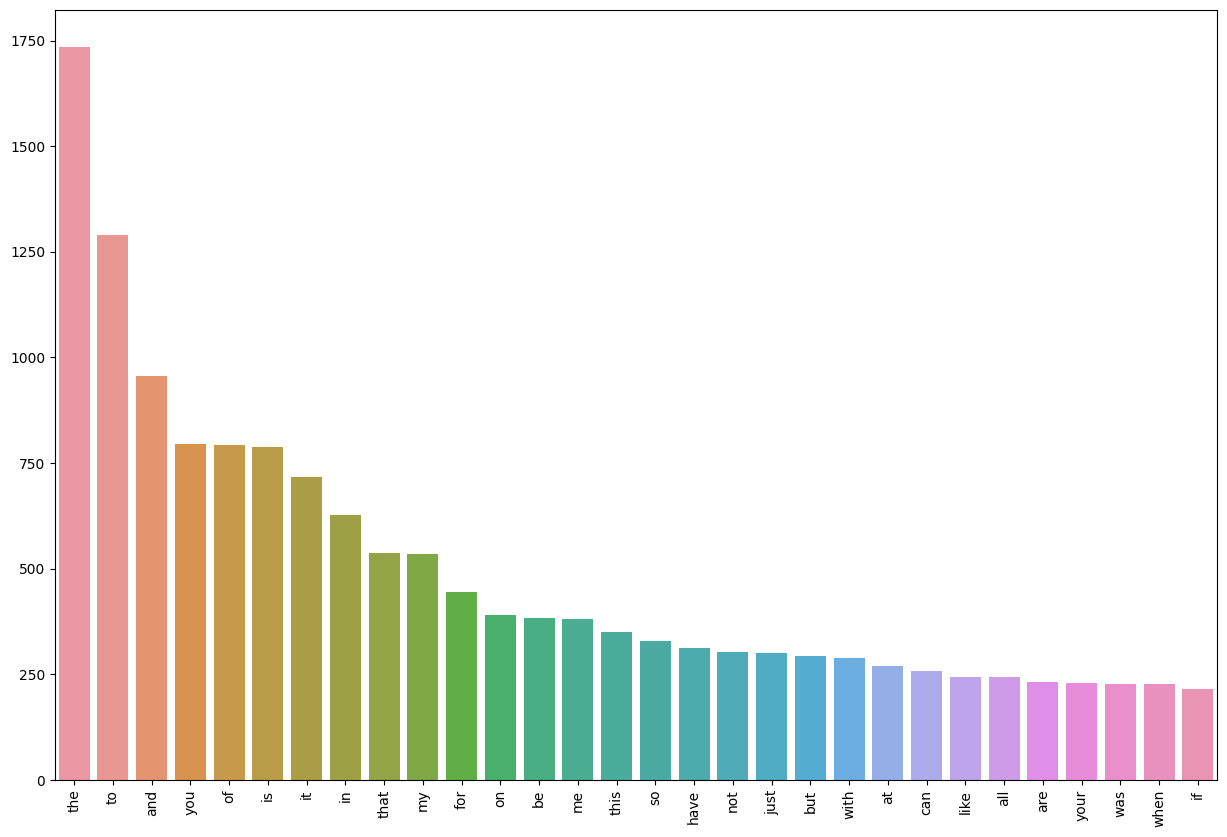

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#We plot the sorted frequencies for the train data, the first 30 items
plt.subplots(figsize=(15, 10))
g = sns.barplot(x=count_vect_train.get_feature_names_out()[index_train_cut], 
            y=term_sort_frequencies_train[:30])
g.set_xticklabels(count_vect_train.get_feature_names_out()[index_train_cut], rotation = 90);

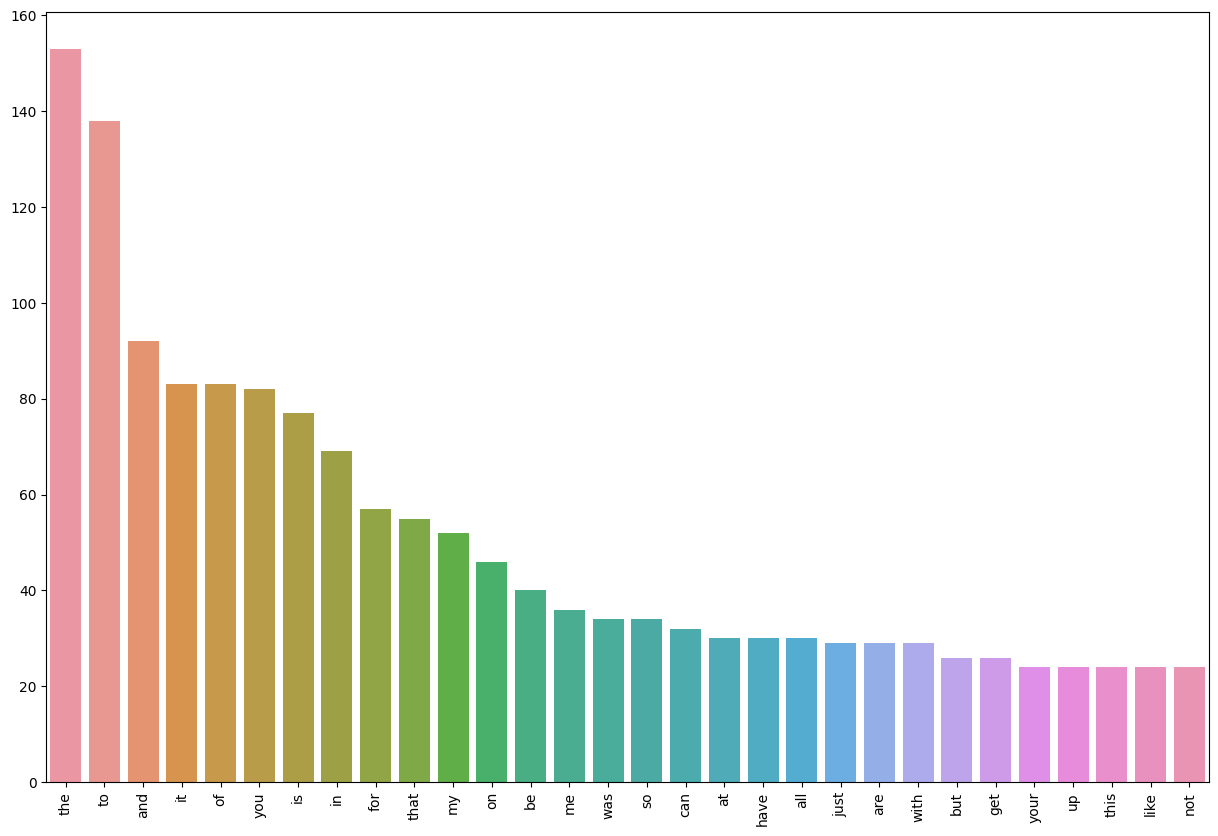

In [12]:
#We plot the sorted frequencies for the test data, the first 30 items
plt.subplots(figsize=(15, 10))
g = sns.barplot(x=count_vect_test.get_feature_names_out()[index_test_cut], 
            y=term_sort_frequencies_test[:30])
g.set_xticklabels(count_vect_test.get_feature_names_out()[index_test_cut], rotation = 90);

#We can see that the frequencies are pretty similar for the words appearing in the train data and the test data.

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [13]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [14]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [15]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

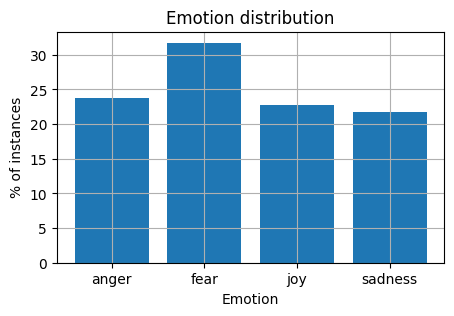

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [19]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [20]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [21]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [22]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [24]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [25]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [26]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\users\didif\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [27]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 8, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [29]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [30]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
#We specify the 1000 features to get with the vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit_transform(train_df['text'])
features_tf=vectorizer.get_feature_names()
#We can see the features after fitting the train data
features_tf[100:110]

c:\users\didif\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [32]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'anger', 'sadness', 'joy', 'joy', 'sadness', 'joy', 'anger',
       'joy', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [38]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [39]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [45]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [46]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

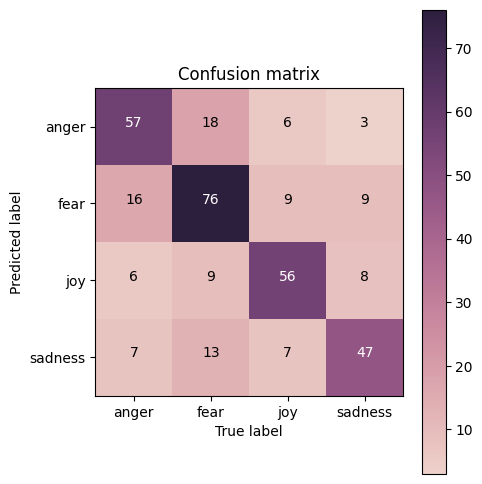

In [47]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [32]:
# Answer here
#Following the confusion matrix we can see that the best predicted parameter is "joy" with 56 correct predictions out of 79,
#which corresponds to 71% in total recall and 56 out of 78 for a 72% in precision. The total items are calculated adding
#the horizontal axis, everything in the diagonal line corresponds to the correct predictions, with anger being 57, fear 76, 
#joy 56 and sadness 47, then everything else in the horizontal line corresponds to false positives predicitions, 
#everything in the vertical line are false negatives predictions. For example there were 16 items were the predicted label 
#was fear but the true label was anger, and so on with the other ones. So we can sum up all the horizontal lines and divide 
#them with the number in its corresponding place in the diagonal line and we can get the percentage of recalls.
#Then we can add all the vertical lines and dividing them to the correct item in the diagonal line and we can get the precision.
#For recall we have Anger with 68%, fear 69%, joy 71% and sadness 64%.
#For precision we have Anger with 66%, fear 66%, joy 72% and sadness 70%.
#The average of the items with the recall values or the precision values will gives us a correct prediction of 68% 
#of testing accuracy.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [40]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
#We build our NB model with the data given
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [41]:
#We predict the data to compare between the training and test results.
y_naive_train_predict=model.predict(X_train)
y_naive_test_predict=model.predict(X_test)

In [42]:
#Getting the accuracy for the training and test results.
acc_train_naive = accuracy_score(y_true=y_train, y_pred=y_naive_train_predict)
acc_test_naive = accuracy_score(y_true=y_test, y_pred=y_naive_test_predict)

print('training accuracy: {}'.format(round(acc_train_naive, 2)))
print('testing accuracy: {}'.format(round(acc_test_naive, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [43]:
print(classification_report(y_true=y_test, y_pred=y_naive_test_predict))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [48]:
cm_naive = confusion_matrix(y_true=y_test, y_pred=y_naive_test_predict) 
print(cm_naive)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


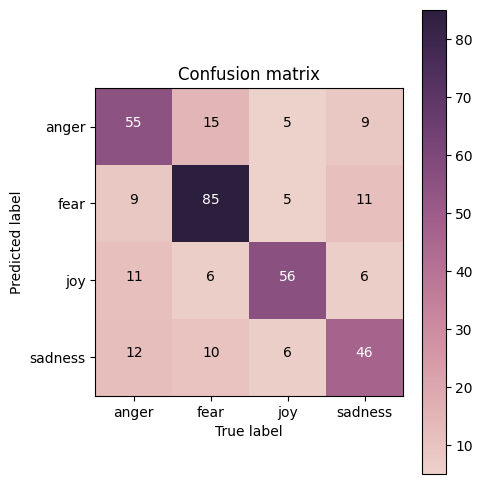

In [49]:
# plot the naive bayes confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_naive, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [34]:
# Answer here
# We can see from the decision tree results that the train data have a 99% of accuracy while the test data have 68%.
# And from the naive bayes model we can see that the train data have a 79% of accuracy while the test data have 70%.

# This tells us that the decision tree model was more prone to overfitting in the training phase, because it got too perfect 
# predictions for the training data and didn't live up to that percentage in the testing phase.
# While the naive bayes model didn't get that high percentage in the training phase but still performed better by 2% compared
# to the decision tree model.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [54]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [55]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2336      joy
438     anger
2681      joy
662     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


C:\Users\didif\AppData\Local\Temp\ipykernel_84348\393062722.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('y_train[0:4]:\n', y_train[0:4])


### 6.3 Build model

In [62]:
# I/O check
print(X_train.shape)
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

(3613, 500)
input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [60]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

### 6.4 Train

In [63]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


c:\users\didif\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_1/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model_1/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 2ms/step - loss: 1.3192 - accuracy: 0.3822 - val_loss: 1.2636 - val_accuracy: 0.4467
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9356 - accuracy: 0.6676 - val_loss: 0.8941 - val_accuracy: 0.6513
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.7974 - val_loss: 0.7857 - val_accuracy: 0.6830
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8500 - val_loss: 0.7740 - val_accuracy: 0.7061
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8815 - val_loss: 0.8067 - val_accuracy: 0.7205
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.9026 - val_loss: 0.8598 - val_accuracy: 0.6945
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.9208 - val_loss: 0.9068 - val_accuracy: 0.7032
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [64]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[2.8841927e-09, 9.9999976e-01, 4.4757651e-09, 2.8440064e-07],
       [3.0842792e-05, 3.5947028e-06, 3.1278697e-07, 9.9996531e-01],
       [1.2239150e-08, 8.9152227e-06, 5.4122955e-07, 9.9999046e-01],
       [6.0258451e-08, 9.9999928e-01, 1.4780784e-07, 4.3189166e-07],
       [2.1976076e-02, 5.0645232e-01, 5.5378368e-05, 4.7151622e-01]],
      dtype=float32)

In [65]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'sadness', 'sadness', 'fear', 'fear'], dtype=object)

In [66]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [67]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.382231,1.319157,0.446686,1.263551
1,1,0.667589,0.935587,0.651297,0.894050
2,2,0.797398,0.558744,0.682997,0.785686
3,3,0.849986,0.409941,0.706052,0.774033
4,4,0.881539,0.334757,0.720461,0.806687
5,5,0.902574,0.276094,0.694524,0.859803
6,6,0.920841,0.230450,0.703170,0.906848
7,7,0.940216,0.191167,0.671470,0.965662
8,8,0.950457,0.167839,0.691643,1.032999
9,9,0.955992,0.149270,0.668588,1.074144


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

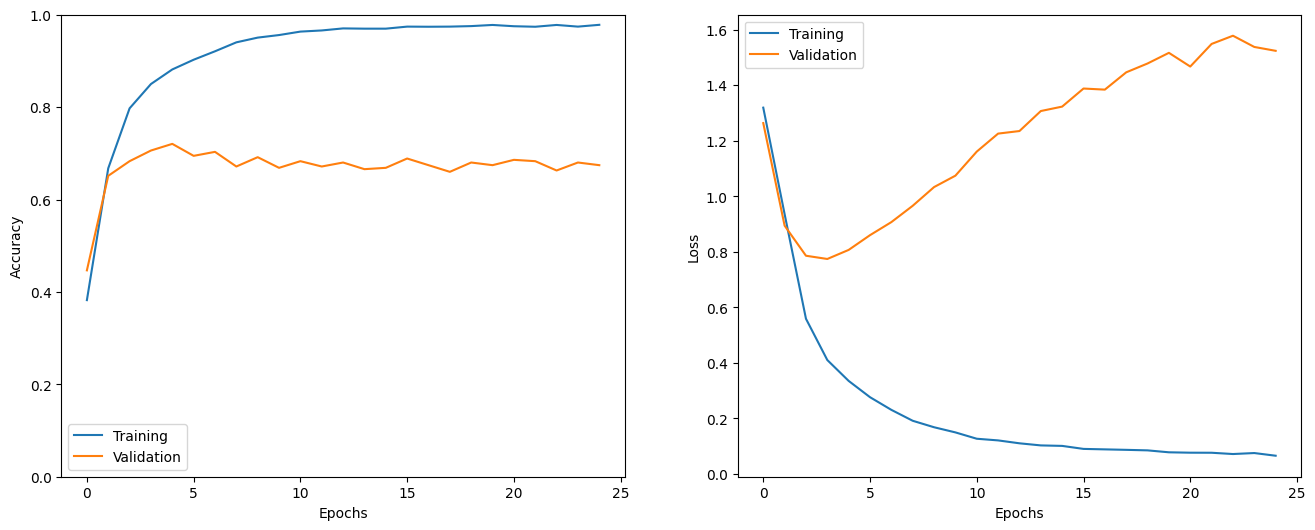

In [68]:
# Answer here
#Function to get the desired graphs
def show_history(h):
    #We get the epochs of our trained model
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    #The first graph will be for the accuracy 
    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    #The second graph will be for the loss 
    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

#We plot the graphs
show_history(history)

In [74]:
#We can see that the accuracy in the training data is getting higher as the epochs increase but the accuracy in the validation
#data doesn't reflect the same, the difference is more obvious in the loss plot, where the loss in the validation data is major
#as the epochs increase, this means that the validation data is getting further apart from the correct value in the prediction.

#Because of these two reasons we can say that the model is overfitted to the training data.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner